In [39]:
from BorderQuery import select_mungedata_simple, select_predictions
from dbhelper import pd_query
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
matplotlib.rcParams.update({'font.size': 22})
from sklearn.metrics import r2_score


In [2]:
print plt.style.available

[u'seaborn-darkgrid', u'seaborn-notebook', u'classic', u'seaborn-ticks', u'grayscale', u'bmh', u'seaborn-talk', u'dark_background', u'ggplot', u'fivethirtyeight', u'seaborn-colorblind', u'seaborn-deep', u'seaborn-whitegrid', u'seaborn-bright', u'seaborn-poster', u'seaborn-muted', u'seaborn-paper', u'seaborn-white', u'seaborn-pastel', u'seaborn-dark', u'seaborn-dark-palette']


## False zero histograms

In [106]:
df = select_mungedata_simple(4, 2, '2007-1-1', '2016-1-1')

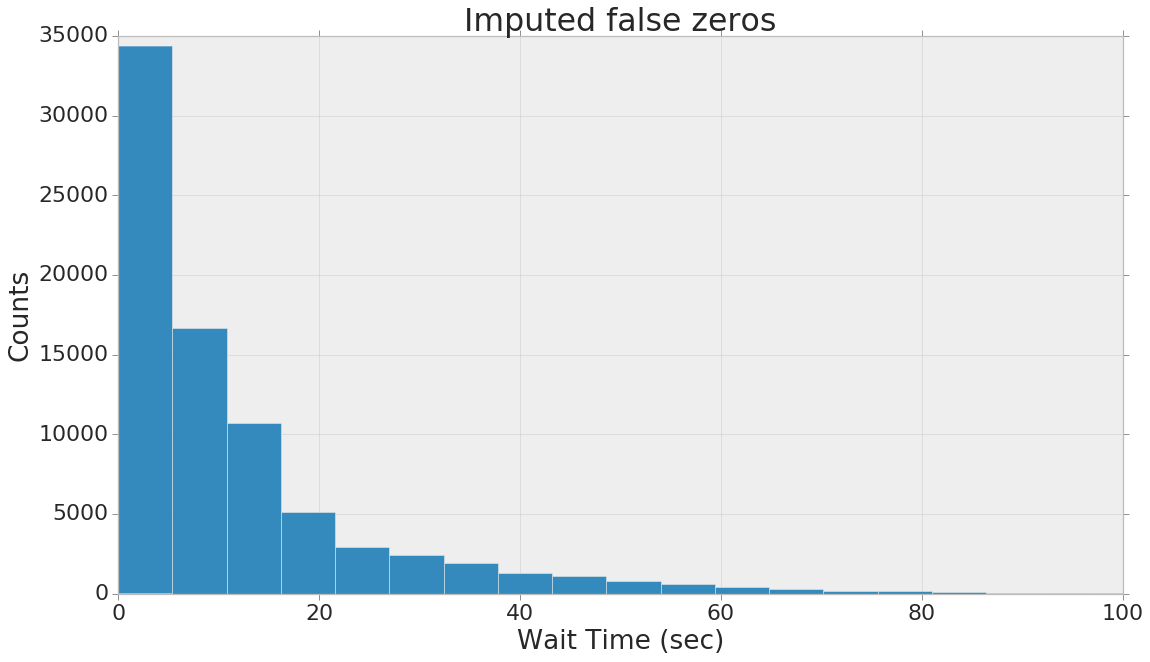

In [7]:
plt.style.use('bmh')
# matplotlib.rcParams.update({'font.size': 22})
plt.figure(figsize=(18,10))
plt.ylabel('Counts')
plt.xlabel('Wait Time (sec)')
plt.xlim([0, 100])
plt.title('Imputed false zeros')
plt.hist(df.waittime, bins=50);

In [107]:
query = '''
        select date, waittime
        from crossingdata
        where crossing_id = 2
        '''
df_old = pd_query(query)


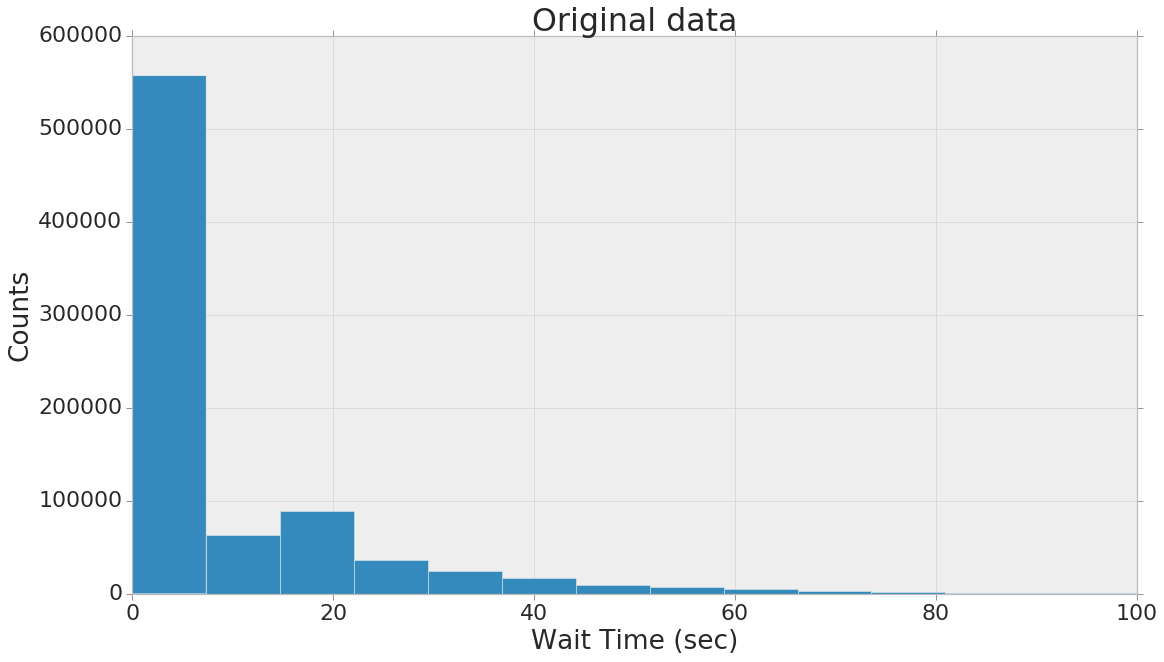

In [11]:
plt.figure(figsize=(18,10))
plt.ylabel('Counts')
plt.xlabel('Wait Time (sec)')
plt.title('Original data')
plt.xlim([0,100])
df_old.waittime.hist(bins=50);

## False zero line chart

In [108]:
# df = df.set_index('date')
df_old = df_old.set_index('date')
df_old.head()

,waittime
date,
2007-01-01 00:00:00,NaN
2007-01-01 00:05:00,NaN
2007-01-01 00:10:00,NaN
2007-01-01 00:15:00,NaN
2007-01-01 00:20:00,NaN


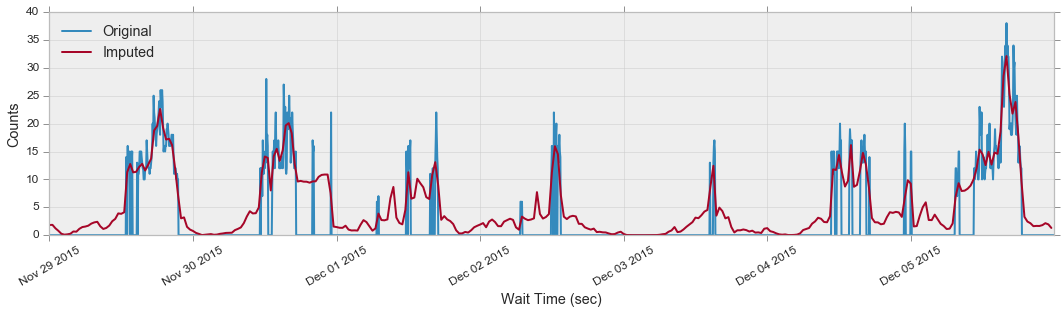

In [35]:
matplotlib.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(figsize=(18,4))
plt.ylabel('Counts')
plt.xlabel('Wait Time (sec)')

labels = ax.get_xticklabels()
plt.setp(labels, rotation=30)

plt.plot(df_old['2015-11-29':'2015-12-5'], label="Original")
plt.plot(df['2015-11-29':'2015-12-5'].waittime, label="Imputed")
plt.legend(loc='upper left');


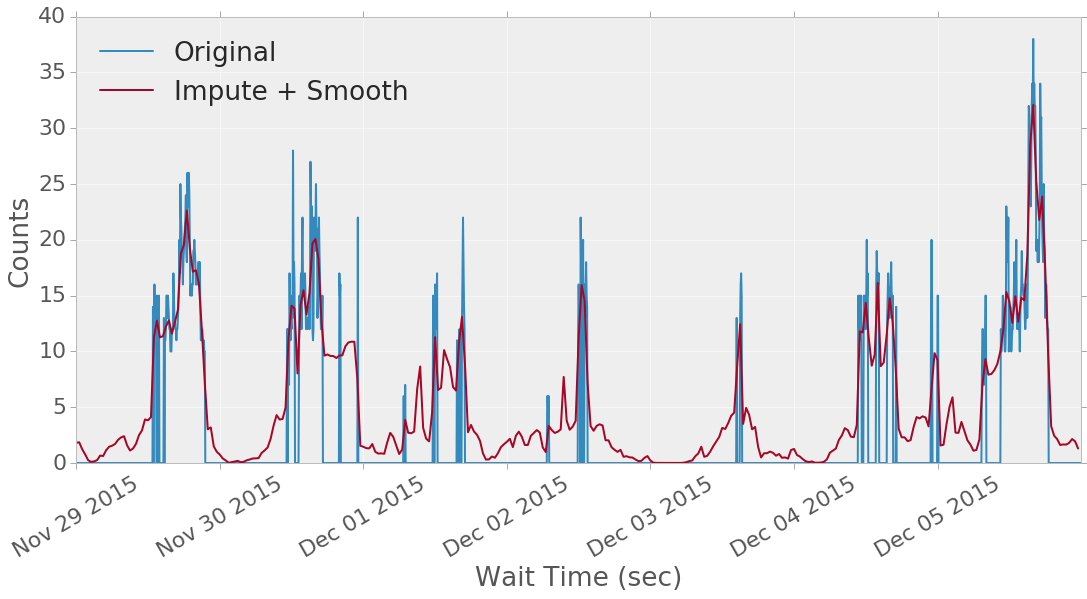

In [111]:
plt.style.use('bmh')
matplotlib.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(figsize=(18,8))
plt.ylabel('Counts')
plt.xlabel('Wait Time (sec)')

labels = ax.get_xticklabels()
plt.setp(labels, rotation=30)

plt.plot(df_old['2015-11-29':'2015-12-5'], label="Original")
plt.plot(df['2015-11-29':'2015-12-5'].waittime, label="Impute + Smooth")
plt.legend(loc='upper left');


## Calculate r2 for northbound

In [94]:
start = '2014-1-1'
end = '2015-1-1'
xing = 2

df_a = select_mungedata_simple(4, xing, start, end)
df_p = select_predictions(4, 'v2.1', xing, start, end)
df_b = select_predictions(4, 'b.1year', xing, start, end)

df = df_a.join(df_p, lsuffix='actual', rsuffix='predict').join(df_b).dropna()

print "Predict: ", r2_score(df.waittimeactual, df.waittimepredict)
print "Baseline: ", r2_score(df.waittimeactual, df.waittime)

Predict:  0.417455227837
Baseline:  0.35456915731


In [96]:
start = '2015-1-1'
end = '2016-1-1'
xing = 2

df_a = select_mungedata_simple(4, xing, start, end)
df_p = select_predictions(4, 'v2.1', xing, start, end)
df_b = select_predictions(4, 'b.1year', xing, start, end)

df = df_a.join(df_p, lsuffix='actual', rsuffix='predict').join(df_b).dropna()

print "Predict: ", r2_score(df.waittimeactual, df.waittimepredict)
print "Baseline: ", r2_score(df.waittimeactual, df.waittime)

Predict:  0.336215457996
Baseline:  0.136155598384


In [97]:
start = '2014-1-1'
end = '2015-1-1'
xing = 6

df_a = select_mungedata_simple(4, xing, start, end)
df_p = select_predictions(4, 'v2.1', xing, start, end)
df_b = select_predictions(4, 'b.1year', xing, start, end)

df = df_a.join(df_p, lsuffix='actual', rsuffix='predict').join(df_b).dropna()

print "Predict: ", r2_score(df.waittimeactual, df.waittimepredict)
print "Baseline: ", r2_score(df.waittimeactual, df.waittime)

Predict:  0.362279036466
Baseline:  0.317647616861


In [98]:
start = '2015-1-1'
end = '2016-1-1'
xing = 6

df_a = select_mungedata_simple(4, xing, start, end)
df_p = select_predictions(4, 'v2.1', xing, start, end)
df_b = select_predictions(4, 'b.1year', xing, start, end)

df = df_a.join(df_p, lsuffix='actual', rsuffix='predict').join(df_b).dropna()

print "Predict: ", r2_score(df.waittimeactual, df.waittimepredict)
print "Baseline: ", r2_score(df.waittimeactual, df.waittime)

Predict:  0.272891607146
Baseline:  0.0294109858536
